In [666]:
import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sns
import scipy as sp
from sklearn.linear_model import LinearRegression
import sklearn.metrics as sk
import sklearn.model_selection as skm


In [645]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
car = pd.read_csv(url,header = None)
header = ["Symboling","Normalized-losses","Make","Fuel-Type","Aspiration","Num-of-doors","Body-Style","Drive-Wheels","Engine-Location","Whell-Base","Length","Width","Height","Curb-Weight","Engine-Type","Num-of-Cylinders","Engine-Size","Fuel-System","Bore","Stroke","Compression-ratio","Horsepower","Peak-rpm","City-mpg","Highway-mpg","Price"]
car.columns = header
car.describe()

,Symboling,Whell-Base,Length,Width,Height,Curb-Weight,Engine-Size,Compression-ratio,City-mpg,Highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [646]:
car["City-mpg"] = 235/car["City-mpg"]
car.rename(columns ={"City-mpg":"City-L/100km"},inplace = True)
car

,Symboling,Normalized-losses,Make,Fuel-Type,Aspiration,Num-of-doors,Body-Style,Drive-Wheels,Engine-Location,Whell-Base,...,Engine-Size,Fuel-System,Bore,Stroke,Compression-ratio,Horsepower,Peak-rpm,City-L/100km,Highway-mpg,Price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,11.190476,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,11.190476,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,12.368421,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102,5500,9.791667,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115,5500,13.055556,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110,5500,12.368421,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,12.368421,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,12.368421,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140,5500,13.823529,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.00,160,5500,14.687500,22,?


In [647]:
binwidth = int((max(car["Price"])-min(car["Price"]))/4)
bins = range(min(car["Price"]),max(car["Price"]),binwidth)
group_name = ["Low","Medium","High"]
car["price-binned"] = pd.cut(car["Price"],bins,labels = group_name)



TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [ ]:
car

In [ ]:
car[["Diesel","Gas"]] = pd.get_dummies(car["Fuel-Type"])
car


In [648]:
temp_value = car["Drive-Wheels"].value_counts()
temp_value.index.name = "Drive-Wheel"
temp_value.rename(columns = {"Drive-Wheels":"Value Counts"},inplace = True)


Drive-Wheel
fwd    120
rwd     76
4wd      9
dtype: int64

In [649]:
y = car["Price"]
x = car["Engine-Size"]
mp.scatter(x,y)
fig = mp.figure(figsize = (1,5))
mp.show(fig)


ValueError: could not convert string to float: ?

In [ ]:
sns.boxplot(x="Drive-Wheels",y="Price",data=car,width = 0.3)
mp.show()


In [ ]:
group1 = car[['Drive-Wheels','Body-Style','Price']]
df_grp = group1.groupby(['Drive-Wheels','Body-Style'],as_index = False).mean()

df_grp



In [650]:
df_grp.pivot('Drive-Wheels','Body-Style')


Price                                            \
Body-Style   convertible       hardtop     hatchback         sedan   
Drive-Wheels                                                         
4wd                  NaN           NaN   3801.500000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9467.526316   
rwd              23949.6  24202.714286  13583.157895  21711.833333   

                            
Body-Style           wagon  
Drive-Wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [651]:
df_Anova = car[["Make","Price"]]
df_GroupBy = df_Anova.groupby("Make")
anova_result = sp.stats.f_oneway(df_GroupBy.get_group("honda")["Price"],df_GroupBy.get_group("jaguar")["Price"])
anova_result

F_onewayResult(statistic=400.925870564337, pvalue=1.0586193512077862e-11)

In [652]:
temp10 = car["Horsepower"] == "?"
car.ix[temp10,"Horsepower"] = 0
temp11 = car["Price"] == "?"
car.ix[temp11,"Price"] = 0
car["Horsepower"] = car["Horsepower"].astype(int)
car["Price"] = car["Price"].astype(int)



/Users/singyinli/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  


In [653]:
a,b = sp.stats.pearsonr(car2[["Horsepower","Curb-Weight","Engine-Size","Highway-mpg"]],car2["Price"])

ValueError: operands could not be broadcast together with shapes (205,4) (205,) 

In [654]:
Pearson_cor , p_value = sp.stats.pearsonr(car["Horsepower"],car["Price"])
Pearson_cor , p_value

(0.691287878794279, 1.8175735366186141e-30)

In [655]:
lm = LinearRegression()
car2 = car
temp_car = car2["Price"] == 0
car2.ix[[9,44,45,129],["Price"]] = [20000,10000,10000,30000]
X = car2["Horsepower"]
Y = car2["Price"]
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)

/Users/singyinli/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  import sys
/Users/singyinli/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:8: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [656]:
lm.fit(X,Y)
Yhat = lm.predict(X)
car2["Yhat"] = Yhat
car2
lm.intercept_, lm.coef_

(array([-2655.04685024]), array([[ 154.45651126]]))

In [657]:
car2.columns

Index([u'Symboling', u'Normalized-losses', u'Make', u'Fuel-Type',
       u'Aspiration', u'Num-of-doors', u'Body-Style', u'Drive-Wheels',
       u'Engine-Location', u'Whell-Base', u'Length', u'Width', u'Height',
       u'Curb-Weight', u'Engine-Type', u'Num-of-Cylinders', u'Engine-Size',
       u'Fuel-System', u'Bore', u'Stroke', u'Compression-ratio', u'Horsepower',
       u'Peak-rpm', u'City-L/100km', u'Highway-mpg', u'Price', u'Yhat'],
      dtype='object')

In [668]:
z = car2[["Horsepower","Curb-Weight","Engine-Size","Highway-mpg"]]
Y = car2["Price"]
lm.fit(z,Y)
Yhat2 = lm.predict(z)
car2["Yhat2"] = Yhat2
temp = car2["Price"] - car2["Yhat"]
temp2 = car2["Price"] - car2["Yhat2"]
car2["Error1"] = temp
car2["Error2"] = temp2
car2
lm.score(z,Y)

0.81325077262461631

In [659]:
sk.mean_squared_error(car2["Price"],car2["Yhat"])
sk.mean_squared_error(car2["Price"],car2["Yhat2"])

11823001.851764275

In [660]:
xxx = car2["Highway-mpg"].reshape(-1,1)
yyy = car2["Price"].reshape(-1,1)
lm.fit(xxx,yyy)
abc = lm.predict(xxx)
temp_dis1 = sns.distplot(abc ,hist = False,color= "red",label = "Yhat")
sns.distplot(Y,hist = False,color= "blue",label = "Actual",ax= temp_dis1)
mp.show()

/Users/singyinli/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.
/Users/singyinli/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


ValueError: could not convert string to float: ?

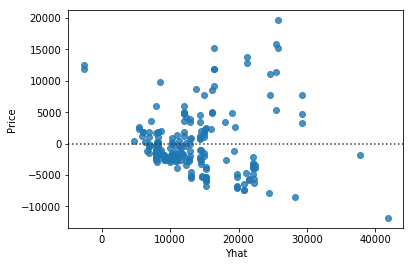

In [661]:
sns.residplot(car2["Yhat"],car2['Price'])
mp.show()

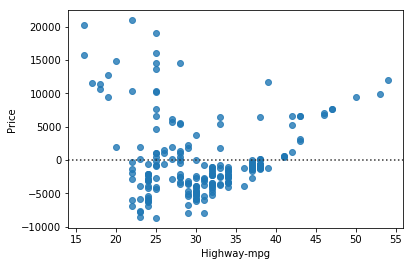

In [662]:
sns.residplot(car2["Highway-mpg"],car2["Price"])
mp.show()

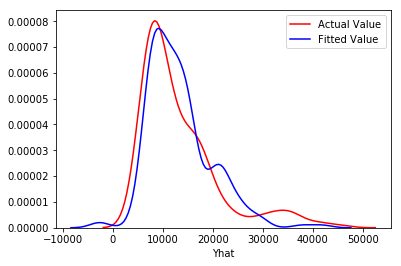

In [663]:
an1 = sns.distplot(car2["Price"],hist=False,color = "red",label= "Actual Value")
sns.distplot(car2["Yhat"],hist = False , color = "blue" , label = "Fitted Value",ax=an1)
mp.show()

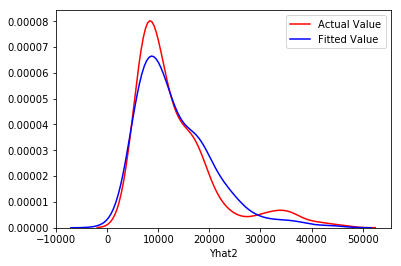

In [664]:
an1 = sns.distplot(car2["Price"],hist=False,color = "red",label= "Actual Value")
sns.distplot(car2["Yhat2"],hist = False , color = "blue" , label = "Fitted Value",ax=an1)
mp.show()

In [667]:
new_lm = LinearRegression()
new_X = car2["Horsepower"]
new_Y = car2["Price"]
new_X = new_X.reshape(-1, 1)
new_Y = new_Y.reshape(-1, 1)
new_lm.fit(new_X,new_Y)


/Users/singyinli/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.
/Users/singyinli/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [680]:
score = skm.cross_val_score(lm,z,Y,cv=3)
score.mean()

0.70346938300512685

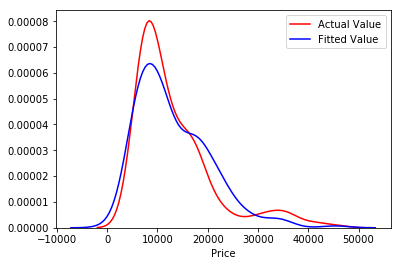

In [683]:
prediction = skm.cross_val_predict(lm,z,Y,cv=3)
an1 = sns.distplot(car2["Price"],hist=False,color = "red",label= "Actual Value")
sns.distplot(prediction,hist = False , color = "blue" , label = "Fitted Value",ax=an1)
mp.show()